# Regresion Lineal Multiple

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data_train = pd.read_csv("/content/sample_data/california_housing_train.csv")
data_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [5]:
data_test=pd.read_csv("/content/sample_data/california_housing_test.csv")
data_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [6]:
data_train.isnull().sum().sum()

0

In [7]:
data_test.isnull().sum().sum()

0

In [10]:
xtrain = data_train.drop(["median_house_value"], axis=1) #quitamos la columna "median_house_value"
xtrain.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [18]:
ytrain = pd.DataFrame(data_train["median_house_value"], columns=["median_house_value"])
ytrain.head()

,median_house_value
0,66900.0
1,80100.0
2,85700.0
3,73400.0
4,65500.0


In [22]:
xtest = data_test.drop(["median_house_value"], axis=1)
xtest.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375


In [23]:
ytest = pd.DataFrame(data_test["median_house_value"], columns=["median_house_value"])
ytest.head()

,median_house_value
0,344700.0
1,176500.0
2,270500.0
3,330000.0
4,81700.0


In [42]:
import sklearn.linear_model as sklm

In [25]:
modelo = sklm.LinearRegression()
modelo.fit(xtrain,np.array(ytrain).flatten())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
modelo.score(xtrain,ytrain)

0.6413378529502686

In [27]:
print("R2 TRAINING SET= ", modelo.score(xtrain,ytrain))
print("R2 TRAINING SET= ", modelo.score(xtest,ytest))

R2 TRAINING SET=  0.6413378529502686
R2 TRAINING SET=  0.6195057678312047


In [29]:
modelo.coef_

array([-4.31396373e+04, -4.29256731e+04,  1.15069493e+03, -8.37825121e+00,
        1.17648543e+02, -3.84887721e+01,  4.54360026e+01,  4.05070684e+04])

**Ejercicio**: calcular el precio de una vivienda ubicada en un bloque con las siguientes caracteristicas



*   longitud: -119.15
*   Latitud: 35.28
*   total rooms: 1000
*   total_bedrooms: 240
*   population: 800
*   households: 200
*   median_income: 3
*   median_house_value: ???
*   housing_median age=20





In [30]:
xx= np.array([-119.15, 35.28, 20, 1000, 240, 800, 200, 3])
yp = modelo.predict([xx])
yp

array([147757.82534198])

In [32]:
pesos = pd.DataFrame({"features":xtest.columns, "pesos":modelo.coef_, "peso abs":abs(modelo.coef_)})
pesos.sort_values("peso abs", ascending=False)

,features,pesos,peso abs
0,longitude,-43139.637258,43139.637258
1,latitude,-42925.673088,42925.673088
7,median_income,40507.068359,40507.068359
2,housing_median_age,1150.694932,1150.694932
4,total_bedrooms,117.648543,117.648543
6,households,45.436003,45.436003
5,population,-38.488772,38.488772
3,total_rooms,-8.378251,8.378251


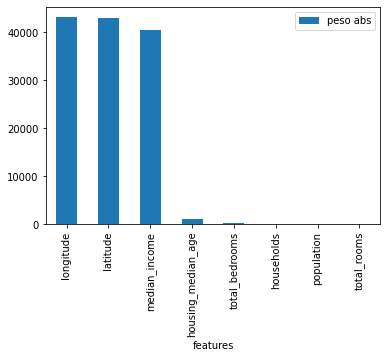

In [33]:
pesos.sort_values("peso abs", ascending=False).plot(x="features", y="peso abs", kind="bar")

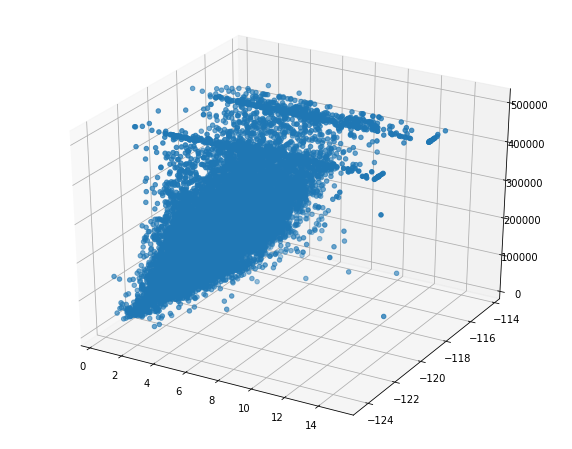

In [34]:
fig = plt.figure(figsize=(10,8))
ax=plt.axes(projection="3d")
ax.scatter(data_train["median_income"], data_train["longitude"],data_train["median_house_value"])

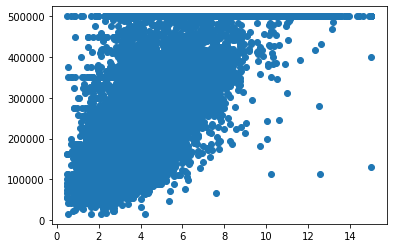

In [35]:
plt.scatter(data_train["median_income"], data_train["median_house_value"])

Ejempplo 2

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.data

In [9]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [10]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
#formamos el data frame
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
data["target"]=boston["target"]
data["target"]
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [53]:
#separamos en train saet y test set
import sklearn.model_selection as skms
train, test = skms.train_test_split(data, test_size=0.3) #30% para prueba, 70% para entrenamiento

xtrain = train[boston.feature_names]
ytrain = train["target"]

xtest = test[boston.feature_names]
ytest = test["target"]

In [54]:
modelo = sklm.LinearRegression()

In [55]:
modelo.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
modelo.score(xtrain,ytrain)

0.7629148103507722

In [57]:
modelo.score(xtest,ytest)

0.6709777275512538

In [60]:
pesos = pd.DataFrame({
    "features": boston["feature_names"],
    "pesos": modelo.coef_,
    "peso_abs": abs(modelo.coef_)
})
pesos.sort_values("peso_abs", ascending=False)

,features,pesos,peso_abs
4,NOX,-17.823491,17.823491
5,RM,4.529926,4.529926
7,DIS,-1.412980,1.412980
3,CHAS,1.367991,1.367991
10,PTRATIO,-0.866208,0.866208
12,LSTAT,-0.522458,0.522458
8,RAD,0.311916,0.311916
0,CRIM,-0.115658,0.115658
2,INDUS,0.075520,0.075520
1,ZN,0.051518,0.051518


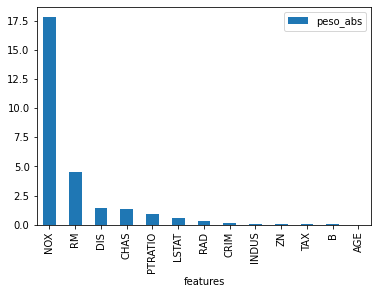

In [67]:
pesos.sort_values("peso_abs", ascending=False).plot(x="features", y="peso_abs", kind="bar")

In [68]:
xtrain.max()

CRIM        88.9762
ZN          95.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
dtype: float64

In [69]:
xtrain.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.86300
AGE          6.00000
DIS          1.13700
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.92000
dtype: float64

Los valores de los parametros estan muy dispersos, entonces es una buena practica escalarlos

#Escalamiento de variables

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [73]:
scaler.fit(xtrain)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [74]:
xtrain_escalado = scaler.transform(xtrain)
xtest_escalado = scaler.transform(xtest)

In [83]:
xtrain_escalado.min(axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [84]:
modelo = sklm.LinearRegression()
modelo.fit(xtrain_escalado,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
pesos = pd.DataFrame({"features":boston["feature_names"], 
                      "pesos":modelo.coef_,"peso abs.":abs(modelo.coef_)})
pesos.sort_values("peso abs.",ascending=False)

,features,pesos,peso abs.
5,RM,22.273644,22.273644
12,LSTAT,-18.834602,18.834602
7,DIS,-15.527947,15.527947
0,CRIM,-10.290091,10.290091
4,NOX,-8.662217,8.662217
10,PTRATIO,-8.142356,8.142356
9,TAX,-7.409242,7.409242
8,RAD,7.174077,7.174077
1,ZN,4.894225,4.894225
11,B,4.403722,4.403722


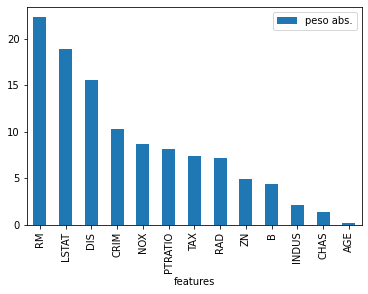

In [86]:
pesos.sort_values("peso abs.",ascending=False).plot(x="features",y="peso abs.",kind="bar")

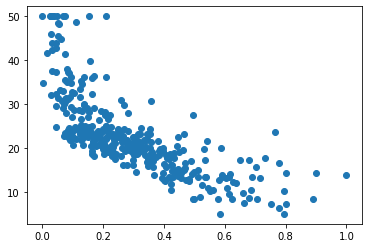

In [97]:
plt.scatter(xtrain_escalado[:,12],ytrain)

transformacion polinomica de variables

In [98]:
from sklearn.preprocessing import PolynomialFeatures

In [120]:
poly = PolynomialFeatures(degree=3)
xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.fit_transform(xtest)

In [121]:
xtrain_poly.shape #350 datos y 560 combinaciones de features

(354, 560)

In [122]:
poly.get_feature_names()[0:20]

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5']

In [123]:
modelo = sklm.LinearRegression(fit_intercept=False)
modelo.fit(xtrain_poly,ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [124]:
modelo.score(xtrain_poly,ytrain)

1.0

In [125]:
modelo.score(xtest_poly,ytest)

-2263.040539614636

In [ ]:
modelo.coef_

In [127]:
modelo_lasso = sklm.Lasso(fit_intercept=False)
modelo_lasso.fit(xtrain_poly,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 868.3314938984547, tolerance: 21.276802
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [128]:
modelo_lasso.score(xtrain_poly,ytrain)

0.9563872431811961

In [ ]:
alphas = [1,2,4,8,20,50,100,200,500,1000]
modelo_lassocv = sklm.LassoCV(alphas = alphas, fit_intercept=False, cv=4)
modelo_lassocv.fit(xtrain_poly,ytrain)